In [1]:
############ Plot Stacked Bar Charts SSC Composition Over Time ###################
# The purpose of this script is to make plots that have stacked barcharts
# of the sediment classes comprising the total (and/or average) SSC in each 
# seabed section over time, with one plot/time series of barcharts per each 
# section.
#
# Notes:
# - The muds for sections 6, 7, and 13 are blowing up so tohse were left out
#   of the bar charts for now but can easily be added back in later once the model
#   crashing is fixed 
# - This has been updated to take out the rivers that are no longer in the 2020 model
#   runs that use Blaskey river data 
# - Note this is similar to plot_ssc_composition_in_sections_barcharts_over_time.py
#   but reads in the data in the netCDFs made in that script to plot here so that
#   the analysis does not need to be redone every time
###################################################################################

In [17]:
# Load in the packages 
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import transforms 
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from matplotlib import cm, ticker
from glob import glob
import cmocean
#import matplotlib.ticker as tick
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors

In [3]:
# Set a universal fontsize
fontsize = 22

# Set the tick size for all plots
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize)

# Prevent tick labels from overlapping
matplotlib.rcParams['xtick.major.pad'] = 12
matplotlib.rcParams['ytick.major.pad'] = 12

In [4]:
# Load in the grid
grid = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Include/KakAKgrd_shelf_big010_smooth006.nc')
#grid = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Grids/KakAKgrd_shelf_big010_smooth006.nc') # UPDATE PATH


In [5]:
# Pull out some dimensions
eta_rho_len = len(grid.eta_rho)
xi_rho_len = len(grid.xi_rho)
s_rho_len = int(20)
Nbed_len = 11

# Multiply by masks to make land appear 
# Make it so land will appear
temp_mask = grid.mask_rho.copy()
temp_mask = np.where(temp_mask==0, np.nan, temp_mask)

In [6]:
# Load in the rho masks 
mask_rho_nan = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_ones_nans.nc') # UPDATE PATH
mask_rho_zeros = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_zeros_ones.nc')
#mask_rho_nan = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_ones_nans.nc')
#mask_rho_zeros = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_zeros_ones.nc')


In [7]:
# Load in the river forcing file 
# -- Aggregated --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_001.nc')
# (2020)
river_frc = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Include/river_forcing_file_beaufort_shelf_10rivs_13seabed_blaskey_data_sagDSS3_rating_001.nc')
# -- Unaggregated (it is the same for now) --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_003.nc')


In [8]:
# Load in the post-processed data for plotting 
# Aggregated 
agg_sed_in_sec_by_source = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/SSC_comp_plots/Aggregated/depth_int_ssc_summed_from_source_in_sections_aggregated_dbsed0001.nc')
agg_sed_in_sec_by_source


<xarray.Dataset> Size: 2MB
Dimensions:                            (ocean_time: 738, section: 13)
Coordinates:
  * ocean_time                         (ocean_time) datetime64[ns] 6kB 2020-0...
  * section                            (section) int64 104B 0 1 2 3 ... 10 11 12
Data variables: (12/23)
    depth_int_ssc_summed_masked_kal    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_col    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sag    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_fis    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_kup    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sta    (ocean_time, section) float64 77kB ...
    ...                                 ...
    depth_int_ssc_summed_masked_sec8   (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec9   (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec10  (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec11  (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec12  (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec13  (ocean_time, section) float64 77kB ...
Attributes:
    description:  Time-series ROMS output of depth-integrated SSC from each s...

In [9]:
# Load in the post-processed data for plotting 
# Unaggregated 
unag_sed_in_sec_by_source = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/SSC_comp_plots/Unaggregated/depth_int_ssc_summed_from_source_in_sections_unaggregated_dbsed0001.nc')
unag_sed_in_sec_by_source

<xarray.Dataset> Size: 2MB
Dimensions:                            (ocean_time: 738, section: 13)
Coordinates:
  * ocean_time                         (ocean_time) datetime64[ns] 6kB 2020-0...
  * section                            (section) int64 104B 0 1 2 3 ... 10 11 12
Data variables: (12/23)
    depth_int_ssc_summed_masked_kal    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_col    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sag    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_fis    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_kup    (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sta    (ocean_time, section) float64 77kB ...
    ...                                 ...
    depth_int_ssc_summed_masked_sec8   (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec9   (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec10  (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec11  (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec12  (ocean_time, section) float64 77kB ...
    depth_int_ssc_summed_masked_sec13  (ocean_time, section) float64 77kB ...
Attributes:
    description:  Time-series ROMS output of depth-integrated SSC from each s...

### Prep for Plotting
Prep/Organize the data to make plotting easier

Divide the data into sections and group to help with plotting 

In [10]:
# Make a list of labels in order
labels_tmp = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_tmp2 = ['Kalikpik', 'Colville', 'Sagavanirktok', 'Fish Creek', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_all_13rivs = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed
labels_all = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']


# Make a list of all colors in order (rivers then seabed sections)
#colors_tmp = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
 #               'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
  #              'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
   #             'hotpink', 'pink', 'lightgray', 'yellowgreen',
     #                            'mediumturquoise']

# =============================================================================
# colors_all = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
#                 'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
#                 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
#                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
#                                  'mediumturquoise', 'powderblue' ]
# =============================================================================

# Make a list of seabed colors
seabed_colors = ['cornflowerblue', 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
                 'mediumturquoise', 'powderblue']

# Make a list of colors for the rivers 
river_colors = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
                'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink']

# Make list of colors to use for plots
seabed_section_colors = ['#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
                         '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F', 
                         '#FF6100', '#FFB000','#6490FF']
#river_marker_colors = ['#FC440F', '#00A6A6', '#5EF38C', '#26532B', '#0115F5',
               #        '#9C00A8', '#F43ECF', '#F5ED00']
river_marker_colors = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
                       '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40']

# New colors tmp
# River Order: Kalikpik, Fish Creek, Colville, Sakonowyak, Kuparuk, Putuligayuk, 
# Sagavanirktok, Staines, Canning, Katakturuk, Hulahula, Jago, Siksik, 
# Section 1 ..., Section 13 (sections are in order)
colors_tmp_13rivs = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed 
colors_tmp = ['#FC440F', '#F5ED00', '#5EF38C', '#F43ECF',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 


# New colors tmp2 - with colors for sections 6, 7, 13 removed since we are ignoring those for now
colors_tmp2 = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000']

In [11]:
# Make a function to make datasets 
def make_ssc_comp_dataset_for_given_section(dataset, idx, labels_all): 
    """
    This function takes a given dataset of post-processed model output, 
    then makes a dataset that has the data for a given section for all time. 
    This function needs to be called once for each section, and once for 
    aggregated mud and again for unaggregated mud.

    Inputs:
    - dataset: Loaded netCDF of the data
    - idx: The index to use in the dataset to get the data for that section 
    - labels_all: List of name of labels for columns of data 

    Outputs:
    - sec_data: A dataframe containing the data for a given index of a given dataset

    """

    # Make a dataset of the subset data 
    sec_data = {'Date': dataset.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': dataset.depth_int_ssc_summed_masked_kal[:,idx],
             'Fish Creek': dataset.depth_int_ssc_summed_masked_fis[:,idx],
             'Colville': dataset.depth_int_ssc_summed_masked_col[:,idx],
             #'Sakonowyak': dataset.depth_int_ssc_summed_masked_sak[:,idx],
             'Kuparuk': dataset.depth_int_ssc_summed_masked_kup[:,idx],
             #'Putuligayuk': dataset.depth_int_ssc_summed_masked_put[:,idx],
             'Sagavanirktok': dataset.depth_int_ssc_summed_masked_sag[:,idx],
             'Staines': dataset.depth_int_ssc_summed_masked_sta[:,idx],
             'Canning': dataset.depth_int_ssc_summed_masked_can[:,idx],
             'Katakturuk': dataset.depth_int_ssc_summed_masked_kat[:,idx],
             'Hulahula': dataset.depth_int_ssc_summed_masked_hul[:,idx],
             'Jago': dataset.depth_int_ssc_summed_masked_jag[:,idx],
             #'Siksik': dataset.depth_int_ssc_summed_masked_sik[:,idx],
             'Section 1': dataset.depth_int_ssc_summed_masked_sec1[:,idx],
             'Section 2': dataset.depth_int_ssc_summed_masked_sec2[:,idx],
             'Section 3': dataset.depth_int_ssc_summed_masked_sec3[:,idx],
             'Section 4': dataset.depth_int_ssc_summed_masked_sec4[:,idx],
             'Section 5': dataset.depth_int_ssc_summed_masked_sec5[:,idx],
             'Section 6': dataset.depth_int_ssc_summed_masked_sec6[:,idx],
             'Section 7': dataset.depth_int_ssc_summed_masked_sec7[:,idx],
             'Section 8': dataset.depth_int_ssc_summed_masked_sec8[:,idx],
             'Section 9': dataset.depth_int_ssc_summed_masked_sec9[:,idx],
             'Section 10': dataset.depth_int_ssc_summed_masked_sec10[:,idx],
             'Section 11': dataset.depth_int_ssc_summed_masked_sec11[:,idx],
             'Section 12': dataset.depth_int_ssc_summed_masked_sec12[:,idx], #,
             'Section 13': dataset.depth_int_ssc_summed_masked_sec13[:,idx]}

    # Turn this into a dataframe
    # Make a dataframe 
    sec_df = pd.DataFrame(sec_data, columns=['Date']+labels_all)

    # Return this 
    return(sec_df)




In [12]:
# Call the above function for each section, both aggregated and unaggregated
# Section 1
sec1_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 0, labels_all)
sec1_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 0, labels_all)
# Section 2
sec2_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 1, labels_all)
sec2_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 1, labels_all)
# Section 3
sec3_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 2, labels_all)
sec3_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 2, labels_all)
# Section 4
sec4_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 3, labels_all)
sec4_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 3, labels_all)
# Section 5
sec5_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 4, labels_all)
sec5_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 4, labels_all)
# Section 6
sec6_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 5, labels_all)
sec6_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 5, labels_all)
# Section 7
sec7_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 6, labels_all)
sec7_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 6, labels_all)
# Section 8
sec8_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 7, labels_all)
sec8_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 7, labels_all)
# Section 9
sec9_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 8, labels_all)
sec9_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 8, labels_all)
# Section 10
sec10_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 9, labels_all)
sec10_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 9, labels_all)
# Section 11
sec11_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 10, labels_all)
sec11_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 10, labels_all)
# Section 12
sec12_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 11, labels_all)
sec12_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 11, labels_all)
# Section 13
sec13_data_agg = make_ssc_comp_dataset_for_given_section(agg_sed_in_sec_by_source, 12, labels_all)
sec13_data_unag = make_ssc_comp_dataset_for_given_section(unag_sed_in_sec_by_source, 12, labels_all)

### Plots!
Make some plots!

Text(0.5, 1.0, 'Total SSC in Section 13 (kg/m³)')

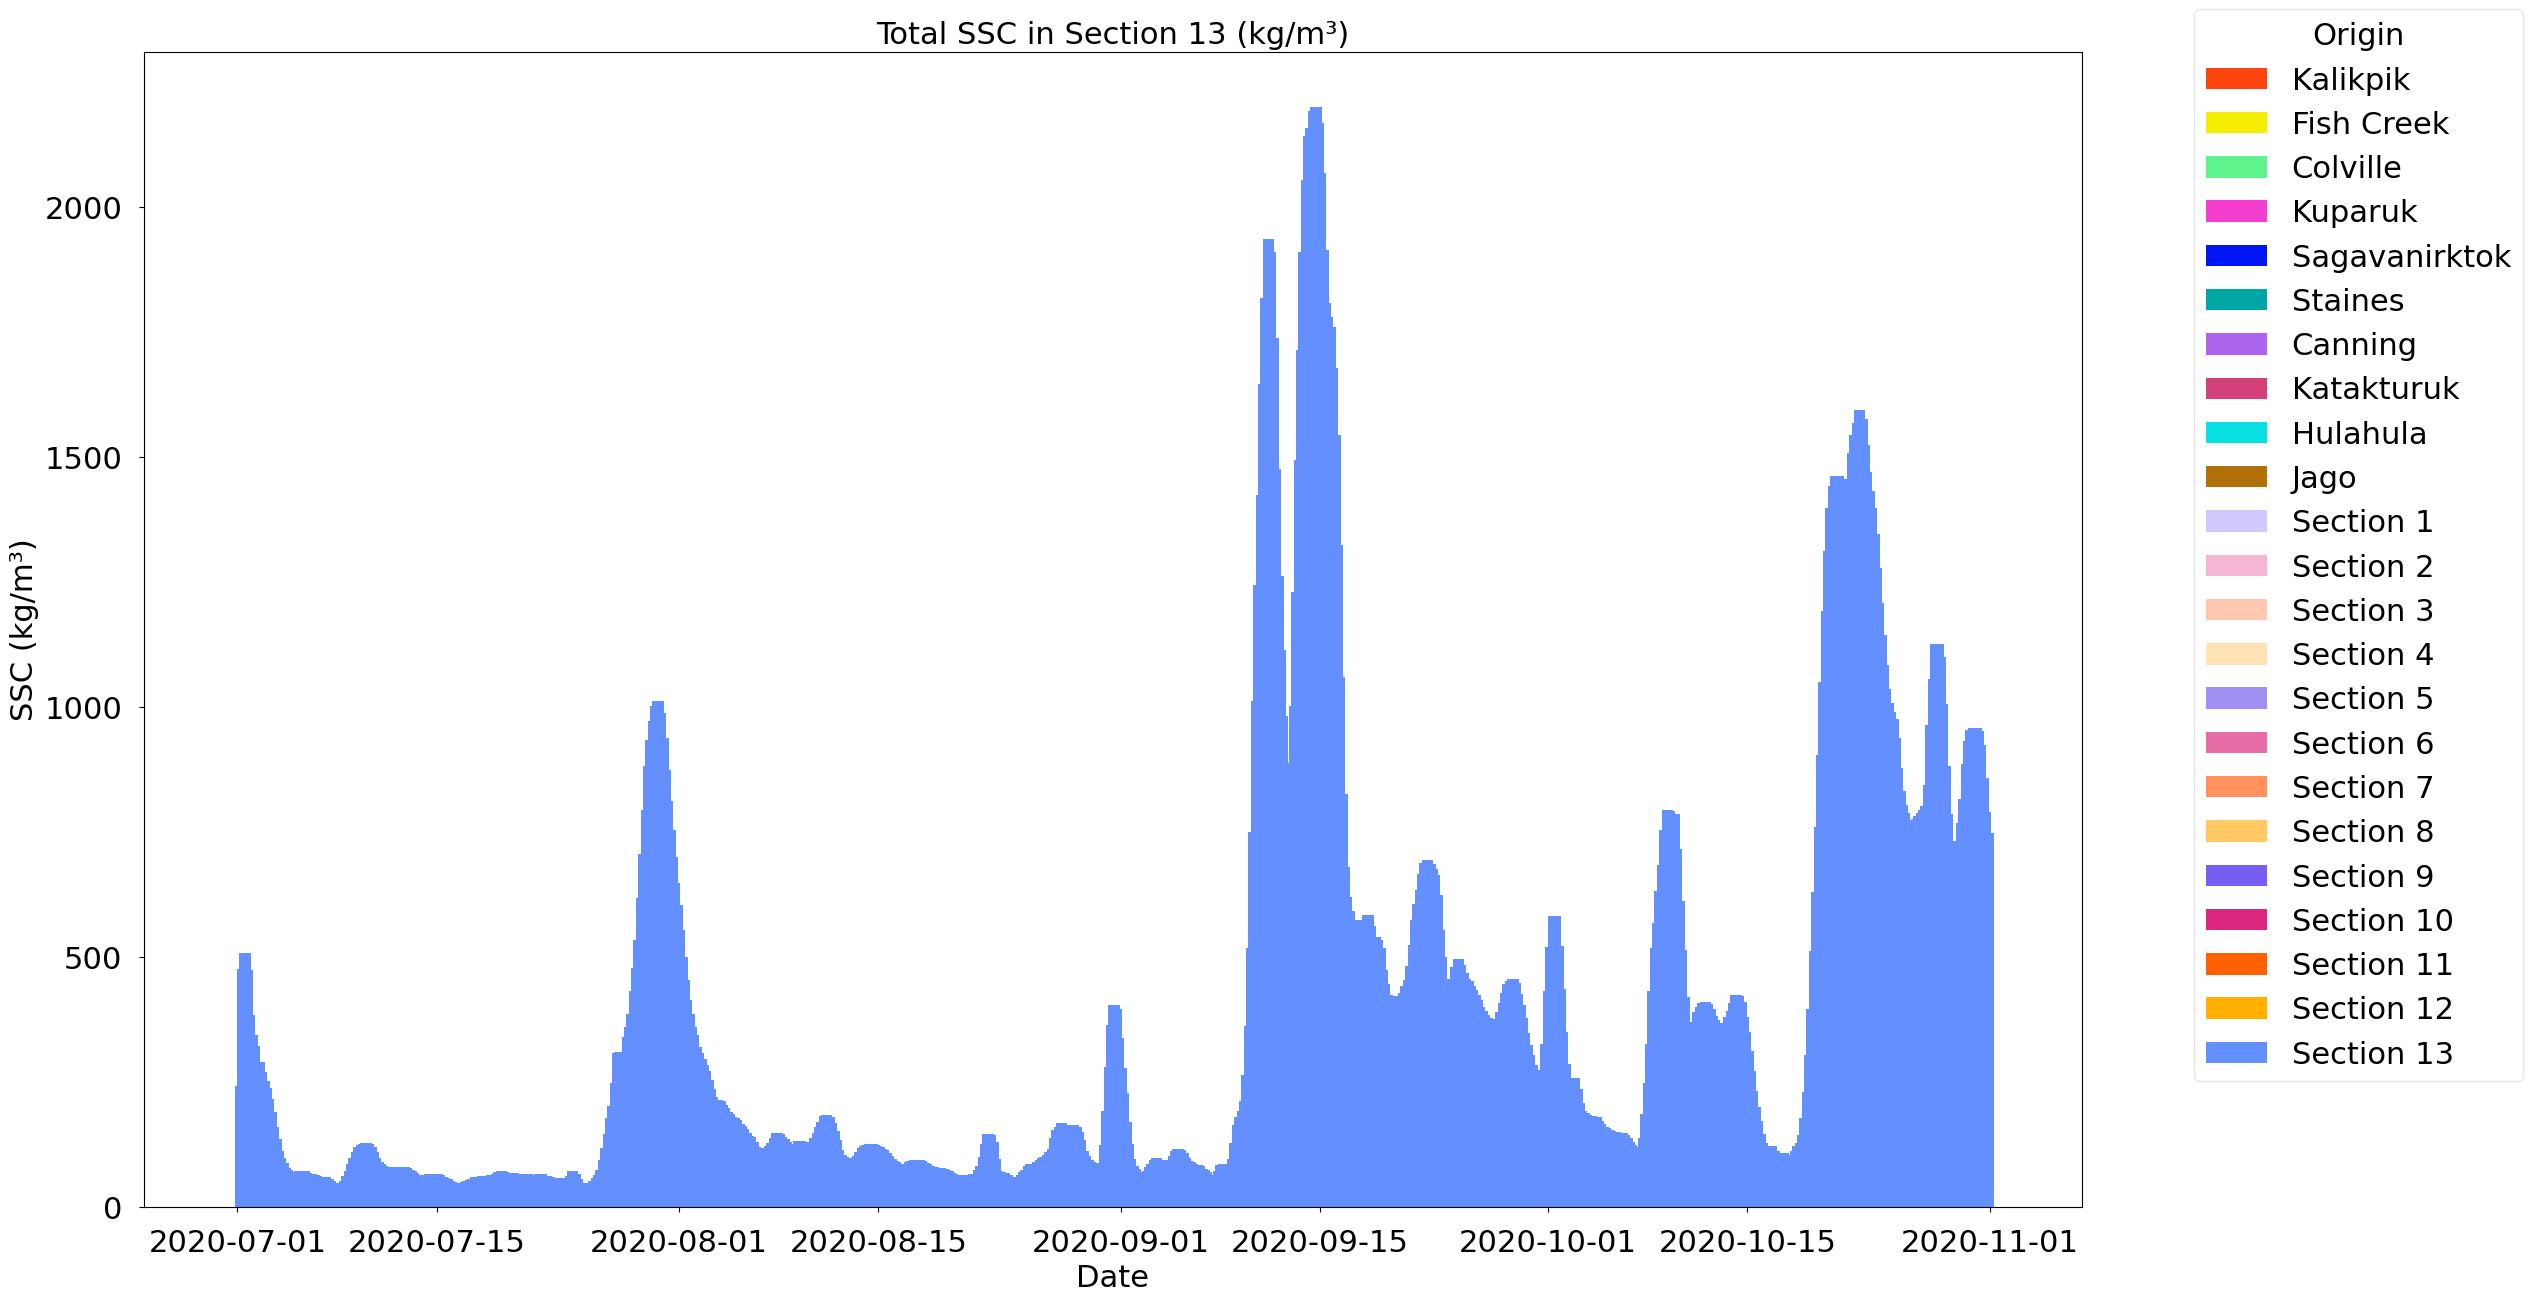

In [13]:
# Test plot to see if this worked....
# Make the figure
fig13, ax13 = plt.subplots(figsize=(25,15))

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom = 0
for l in range(len(labels_all)):
    #print(labels[l])
    ax13.bar(sec13_data_agg['Date'], sec13_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom = bottom + sec13_data_agg[labels_all[l]]

plt.legend(title='Origin', bbox_to_anchor=(1.05, 1.05), loc='upper left', fontsize=fontsize, title_fontsize=fontsize, framealpha=0.5)
ax13.set_xlabel('Date', fontsize=fontsize)
ax13.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
ax13.set_title('Total SSC in Section 13 (kg/m\u00b3)', fontsize=fontsize)

In [ ]:
# Pick which sections we want, then make subplot version of them for here....
# Maybe pick like 4 sections?

# Plot top panel of aggregated and bottom panel of unaggregated

# Make the figure
fig1, ax1 = plt.subplots(2, 4, figsize=(28,10))

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom1 = 0
bottom2 = 0
bottom3 = 0
bottom4 = 0
bottom5 = 0
bottom6 = 0
bottom7 = 0
bottom8 = 0

for l in range(len(labels_all)):
    #print(labels[l])
    # Plot aggregated sections 
    ax1[0,0].bar(sec1_data_agg['Date'], sec1_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom1 = bottom1 + sec1_data_agg[labels_all[l]]
    ax1[0,1].bar(sec6_data_agg['Date'], sec6_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom2 = bottom2 + sec6_data_agg[labels_all[l]]
    ax1[0,2].bar(sec8_data_agg['Date'], sec8_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom3 = bottom3 + sec8_data_agg[labels_all[l]]
    ax1[0,3].bar(sec11_data_agg['Date'], sec11_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom4 = bottom4 + sec11_data_agg[labels_all[l]]
    # Plot the unaggregated sections
    ax1[1,0].bar(sec1_data_unag['Date'], sec1_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom5 = bottom5 + sec1_data_unag[labels_all[l]]
    ax1[1,1].bar(sec6_data_unag['Date'], sec6_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom6 = bottom6 + sec6_data_unag[labels_all[l]]
    ax1[1,2].bar(sec8_data_unag['Date'], sec8_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom7 = bottom7 + sec8_data_unag[labels_all[l]]
    ax1[1,3].bar(sec11_data_unag['Date'], sec11_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom8 = bottom8 + sec11_data_unag[labels_all[l]]



# Plot the legend
plt.legend(title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Make the ylims the same across plots
ax1[0,0].set_ylim(0,730)
ax1[0,1].set_ylim(0,730)
ax1[0,2].set_ylim(0,730)
ax1[0,3].set_ylim(0,730)
ax1[1,0].set_ylim(0,2500)
ax1[1,1].set_ylim(0,2500)
ax1[1,2].set_ylim(0,2500)
ax1[1,3].set_ylim(0,2500)

# Mute x-axis labels for top row
plt.setp(ax1[0,0].get_xticklabels(), visible=False)
plt.setp(ax1[0,1].get_xticklabels(), visible=False)
plt.setp(ax1[0,2].get_xticklabels(), visible=False)
plt.setp(ax1[0,3].get_xticklabels(), visible=False)

# Mute y-axis labels for inner plots
plt.setp(ax1[0,1].get_yticklabels(), visible=False)
plt.setp(ax1[0,2].get_yticklabels(), visible=False)
plt.setp(ax1[0,3].get_yticklabels(), visible=False)
plt.setp(ax1[1,1].get_yticklabels(), visible=False)
plt.setp(ax1[1,2].get_yticklabels(), visible=False)
plt.setp(ax1[1,3].get_yticklabels(), visible=False)


# Decrease number of x tick labels for bottom row 
#plt.setp(ax1[1,0].get_xticklabels(), visible=True, )
ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,2].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,3].xaxis.set_major_locator(ticker.MaxNLocator(2))

# Set subplot titles
ax1[0,0].set_title('Section 1', fontsize=fontsize-3)
ax1[0,1].set_title('Section 6', fontsize=fontsize-3)
ax1[0,2].set_title('Section 8', fontsize=fontsize-3)
ax1[0,3].set_title('Section 11', fontsize=fontsize-3)

# Label axes
ax1[0,0].set_ylabel('Total \nAggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_ylabel('Total \nUnaggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,1].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,2].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,3].set_xlabel('Date', fontsize=fontsize-2)

# Add subplot labels 
fig1.text(0.129, 0.845, 'a)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.327, 0.845, 'b)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.526, 0.845, 'c)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.726, 0.845, 'd)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.129, 0.438, 'e)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.327, 0.438, 'f)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.526, 0.438, 'g)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.726, 0.438, 'h)', color='black', fontsize=fontsize-5, weight='bold')

#ax1.set_xlabel('Date', fontsize=fontsize)
#ax1.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
#plt.suptitle('SSC Composition in Sections (kg/m\u00b3)', fontsize=fontsize)

# Adjust spacing
fig1.subplots_adjust(wspace=0.10, hspace=0.12)

In [14]:
# Make a version of the above plot but with different colors
# one color for local resuspension, another for advected, 
# and a third for rivers

# Make custom color maps 
# 
# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed 
# Order: Kalikpik, Fish creek, Colville, Kuparik, Sagavanirktok, Staines,
# Canning, Katakturuk, Hulahula, Jago, Section 1, Section 2, Section 3, 
# Section 4, Section 5, Section 6, Section 7, Section 8, Section 9, Section 10,
# Section 11, Section 12, Section 13
colors_tmp = ['#FC440F', '#F5ED00', '#5EF38C', '#F43ECF',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 
# Local resuspension: #56B4E9; Rivers: #E69F00; Advected: #009E73
colors_tmp_sec1 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#56B4E9', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73']
colors_tmp_sec6 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#56B4E9', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73']
colors_tmp_sec8 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#56B4E9', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73']
colors_tmp_sec11 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#56B4E9', '#009E73', '#009E73', '#009E73']
colors_tmp_3colors = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#56B4E9']


In [15]:
# Make new dataset that has them in better order for plotting - 
# do this manuallyyyyy
# Section 1
sec1_agg_neworder = {'Date': agg_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,0],
             'Fish Creek': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,0],
             'Colville': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,0],
             #'Sakonowyak': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[:,0],
             'Kuparuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,0],
             #'Putuligayuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,idx],
             'Sagavanirktok': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,0],
             'Staines': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,0],
             'Canning': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,0],
             'Katakturuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,0],
             'Hulahula': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,0],
             'Jago': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,0],
             #'Siksik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,idx],
             'Section 2': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,0],
             'Section 3': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,0],
             'Section 4': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,0],
             'Section 5': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,0],
             'Section 6': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,0],
             'Section 7': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,0],
             'Section 8': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,0],
             'Section 9': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,0],
             'Section 10': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,0],
             'Section 11': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,0],
             'Section 12': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,0], #,
             'Section 13': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,0],
             'Section 1': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,0]}

sec1_unag_neworder = {'Date': unag_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,0],
             'Fish Creek': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,0],
             'Colville': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,0],
             #'Sakonowyak': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[0,idx],
             'Kuparuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,0],
             #'Putuligayuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,idx],
             'Sagavanirktok': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,0],
             'Staines': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,0],
             'Canning': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,0],
             'Katakturuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,0],
             'Hulahula': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,0],
             'Jago': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,0],
             #'Siksik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,idx],
             'Section 2': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,0],
             'Section 3': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,0],
             'Section 4': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,0],
             'Section 5': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,0],
             'Section 6': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,0],
             'Section 7': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,0],
             'Section 8': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,0],
             'Section 9': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,0],
             'Section 10': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,0],
             'Section 11': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,0],
             'Section 12': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,0], #,
             'Section 13': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,0],
             'Section 1': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,0]}

# Section 6
sec6_agg_neworder = {'Date': agg_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,5],
             'Fish Creek': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,5],
             'Colville': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,5],
             #'Sakonowyak': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[:,5],
             'Kuparuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,5],
             #'Putuligayuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,idx],
             'Sagavanirktok': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,5],
             'Staines': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,5],
             'Canning': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,5],
             'Katakturuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,5],
             'Hulahula': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,5],
             'Jago': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,5],
             #'Siksik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,idx],
             'Section 1': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,5],
             'Section 2': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,5],
             'Section 3': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,5],
             'Section 4': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,5],
             'Section 5': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,5],
             'Section 7': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,5],
             'Section 8': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,5],
             'Section 9': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,5],
             'Section 10': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,5],
             'Section 11': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,5],
             'Section 12': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,5], #,
             'Section 13': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,5],
             'Section 6': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,5]}

sec6_unag_neworder = {'Date': unag_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,5],
             'Fish Creek': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,5],
             'Colville': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,5],
             #'Sakonowyak': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[:,5],
             'Kuparuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,5],
             #'Putuligayuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,5],
             'Sagavanirktok': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,5],
             'Staines': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,5],
             'Canning': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,5],
             'Katakturuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,5],
             'Hulahula': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,5],
             'Jago': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,5],
             #'Siksik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,5],
             'Section 1': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,5],
             'Section 2': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,5],
             'Section 3': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,5],
             'Section 4': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,5],
             'Section 5': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,5],
             'Section 7': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,5],
             'Section 8': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,5],
             'Section 9': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,5],
             'Section 10': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,5],
             'Section 11': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,5],
             'Section 12': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,5], #,
             'Section 13': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,5],
             'Section 6': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,5]}


# Section 8
sec8_agg_neworder = {'Date': agg_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,7],
             'Fish Creek': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,7],
             'Colville': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,7],
             #'Sakonowyak': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[:,7],
             'Kuparuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,7],
             #'Putuligayuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,7],
             'Sagavanirktok': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,7],
             'Staines': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,7],
             'Canning': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,7],
             'Katakturuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,7],
             'Hulahula': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,7],
             'Jago': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,7],
             #'Siksik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,7],
             'Section 1': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,7],
             'Section 2': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,7],
             'Section 3': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,7],
             'Section 4': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,7],
             'Section 5': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,7],
             'Section 6': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,7],
             'Section 7': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,7],
             'Section 9': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,7],
             'Section 10': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,7],
             'Section 11': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,7],
             'Section 12': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,7], #,
             'Section 13': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,7],
             'Section 8': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,7]}

sec8_unag_neworder = {'Date': unag_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,7],
             'Fish Creek': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,7],
             'Colville': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,7],
             #'Sakonowyak': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[:,7],
             'Kuparuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,7],
             #'Putuligayuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,7],
             'Sagavanirktok': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,7],
             'Staines': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,7],
             'Canning': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,7],
             'Katakturuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,7],
             'Hulahula': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,7],
             'Jago': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,7],
             #'Siksik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,7],
             'Section 1': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,7],
             'Section 2': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,7],
             'Section 3': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,7],
             'Section 4': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,7],
             'Section 5': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,7],
             'Section 6': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,7],
             'Section 7': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,7],
             'Section 9': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,7],
             'Section 10': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,7],
             'Section 11': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,7],
             'Section 12': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,7], #,
             'Section 13': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,7],
             'Section 8': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,7]}


# Section 11
sec11_agg_neworder = {'Date': agg_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,10],
             'Fish Creek': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,10],
             'Colville': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,10],
             #'Sakonowyak': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[:,10],
             'Kuparuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,10],
             #'Putuligayuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,10],
             'Sagavanirktok': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,10],
             'Staines': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,10],
             'Canning': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,10],
             'Katakturuk': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,10],
             'Hulahula': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,10],
             'Jago': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,10],
             #'Siksik': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,10],
             'Section 1': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,10],
             'Section 2': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,10],
             'Section 3': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,10],
             'Section 4': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,10],
             'Section 5': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,10],
             'Section 6': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,10],
             'Section 7': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,10],
             'Section 8': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,10],
             'Section 9': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,10],
             'Section 10': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,10],
             'Section 12': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,10], #,
             'Section 13': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,10],
             'Section 11': agg_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,10]}

sec11_unag_neworder = {'Date': unag_sed_in_sec_by_source.ocean_time, # 'Date': time_tmp.astype(float)
             'Kalikpik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kal[:,10],
             'Fish Creek': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_fis[:,10],
             'Colville': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_col[:,10],
             #'Sakonowyak': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sak[:,10],
             'Kuparuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kup[:,10],
             #'Putuligayuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_put[:,10],
             'Sagavanirktok': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sag[:,10],
             'Staines': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sta[:,10],
             'Canning': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_can[:,10],
             'Katakturuk': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_kat[:,10],
             'Hulahula': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_hul[:,10],
             'Jago': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_jag[:,10],
             #'Siksik': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sik[:,10],
             'Section 1': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec1[:,10],
             'Section 2': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec2[:,10],
             'Section 3': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec3[:,10],
             'Section 4': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec4[:,10],
             'Section 5': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec5[:,10],
             'Section 6': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec6[:,10],
             'Section 7': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec7[:,10],
             'Section 8': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec8[:,10],
             'Section 9': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec9[:,10],
             'Section 10': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec10[:,10],
             'Section 12': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec12[:,10], #,
             'Section 13': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec13[:,10],
             'Section 11': unag_sed_in_sec_by_source.depth_int_ssc_summed_masked_sec11[:,10]}

In [16]:
# Make matching labels that are in the right order
labels_all_sec1 = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13', 'Section 1']

labels_all_sec6 = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13', 'Section 6']

labels_all_sec8 = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13', 'Section 8']

labels_all_sec11 = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 12', 'Section 13', 'Section 11']

In [ ]:
len(labels_all)

In [ ]:
# Plot top panel of aggregated and bottom panel of unaggregated

# Make the figure
fig1, ax1 = plt.subplots(2, 4, figsize=(28,10))

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom1 = 0
bottom2 = 0
bottom3 = 0
bottom4 = 0
bottom5 = 0
bottom6 = 0
bottom7 = 0
bottom8 = 0

for l in range(len(labels_all)):
    #print(labels[l])
    # Plot aggregated sections 
    ax1[0,0].bar(sec1_data_agg['Date'], sec1_agg_neworder[labels_all_sec1[l]], label=labels_all_sec1[l], color=colors_tmp_3colors[l])
    bottom1 = bottom1 + sec1_agg_neworder[labels_all_sec1[l]]
    ax1[0,1].bar(sec6_data_agg['Date'], sec6_agg_neworder[labels_all_sec6[l]], label=labels_all_sec6[l], color=colors_tmp_3colors[l])
    bottom2 = bottom2 + sec6_agg_neworder[labels_all_sec6[l]]
    ax1[0,2].bar(sec8_data_agg['Date'], sec8_agg_neworder[labels_all_sec8[l]], label=labels_all_sec8[l], color=colors_tmp_3colors[l])
    bottom3 = bottom3 + sec8_agg_neworder[labels_all_sec8[l]]
    ax1[0,3].bar(sec11_data_agg['Date'], sec11_agg_neworder[labels_all_sec11[l]], label=labels_all_sec11[l], color=colors_tmp_3colors[l])
    bottom4 = bottom4 + sec11_agg_neworder[labels_all_sec11[l]]
    # Plot the unaggregated sections
    ax1[1,0].bar(sec1_data_unag['Date'], sec1_unag_neworder[labels_all_sec1[l]], label=labels_all_sec1[l], color=colors_tmp_3colors[l])
    bottom5 = bottom5 + sec1_unag_neworder[labels_all_sec1[l]]
    ax1[1,1].bar(sec6_data_unag['Date'], sec6_unag_neworder[labels_all_sec6[l]], label=labels_all_sec6[l], color=colors_tmp_3colors[l])
    bottom6 = bottom6 + sec6_unag_neworder[labels_all_sec6[l]]
    ax1[1,2].bar(sec8_data_unag['Date'], sec8_unag_neworder[labels_all_sec8[l]], label=labels_all_sec8[l], color=colors_tmp_3colors[l])
    bottom7 = bottom7 + sec8_unag_neworder[labels_all_sec8[l]]
    ax1[1,3].bar(sec11_data_unag['Date'], sec11_unag_neworder[labels_all_sec11[l]], label=labels_all_sec11[l], color=colors_tmp_3colors[l])
    bottom8 = bottom8 + sec11_unag_neworder[labels_all_sec11[l]]

    print([labels_all_sec1[l]])
    print([labels_all_sec6[l]])
    print([labels_all_sec8[l]])
    print([labels_all_sec11[l]])
    print(colors_tmp_3colors[l])
    #input('press enter to continue')


# Make a custom legend
# Set colors and labels
legend_handles = [
        Patch(facecolor='#E69F00', label='Rivers'),
        Patch(facecolor='#56B4E9', label='Local'),
        Patch(facecolor='#009E73', label='Advected')
    ]
# Plot it 
plt.legend(handles=legend_handles, title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Plot the legend
#plt.legend(title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Make the ylims the same across plots
ax1[0,0].set_ylim(0,730)
ax1[0,1].set_ylim(0,730)
ax1[0,2].set_ylim(0,730)
ax1[0,3].set_ylim(0,730)
ax1[1,0].set_ylim(0,2500)
ax1[1,1].set_ylim(0,2500)
ax1[1,2].set_ylim(0,2500)
ax1[1,3].set_ylim(0,2500)

# Mute x-axis labels for top row
plt.setp(ax1[0,0].get_xticklabels(), visible=False)
plt.setp(ax1[0,1].get_xticklabels(), visible=False)
plt.setp(ax1[0,2].get_xticklabels(), visible=False)
plt.setp(ax1[0,3].get_xticklabels(), visible=False)

# Mute y-axis labels for inner plots
plt.setp(ax1[0,1].get_yticklabels(), visible=False)
plt.setp(ax1[0,2].get_yticklabels(), visible=False)
plt.setp(ax1[0,3].get_yticklabels(), visible=False)
plt.setp(ax1[1,1].get_yticklabels(), visible=False)
plt.setp(ax1[1,2].get_yticklabels(), visible=False)
plt.setp(ax1[1,3].get_yticklabels(), visible=False)


# Decrease number of x tick labels for bottom row 
#plt.setp(ax1[1,0].get_xticklabels(), visible=True, )
ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,2].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,3].xaxis.set_major_locator(ticker.MaxNLocator(2))

# Set subplot titles
ax1[0,0].set_title('Section 1', fontsize=fontsize-3)
ax1[0,1].set_title('Section 6', fontsize=fontsize-3)
ax1[0,2].set_title('Section 8', fontsize=fontsize-3)
ax1[0,3].set_title('Section 11', fontsize=fontsize-3)

# Label axes
ax1[0,0].set_ylabel('Total \nAggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_ylabel('Total \nUnaggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,1].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,2].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,3].set_xlabel('Date', fontsize=fontsize-2)

# Add subplot labels 
fig1.text(0.129, 0.845, 'a)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.327, 0.845, 'b)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.526, 0.845, 'c)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.726, 0.845, 'd)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.129, 0.438, 'e)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.327, 0.438, 'f)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.526, 0.438, 'g)', color='black', fontsize=fontsize-5, weight='bold')
fig1.text(0.726, 0.438, 'h)', color='black', fontsize=fontsize-5, weight='bold')

#ax1.set_xlabel('Date', fontsize=fontsize)
#ax1.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
#plt.suptitle('SSC Composition in Sections (kg/m\u00b3)', fontsize=fontsize)

# Adjust spacing
fig1.subplots_adjust(wspace=0.10, hspace=0.12)

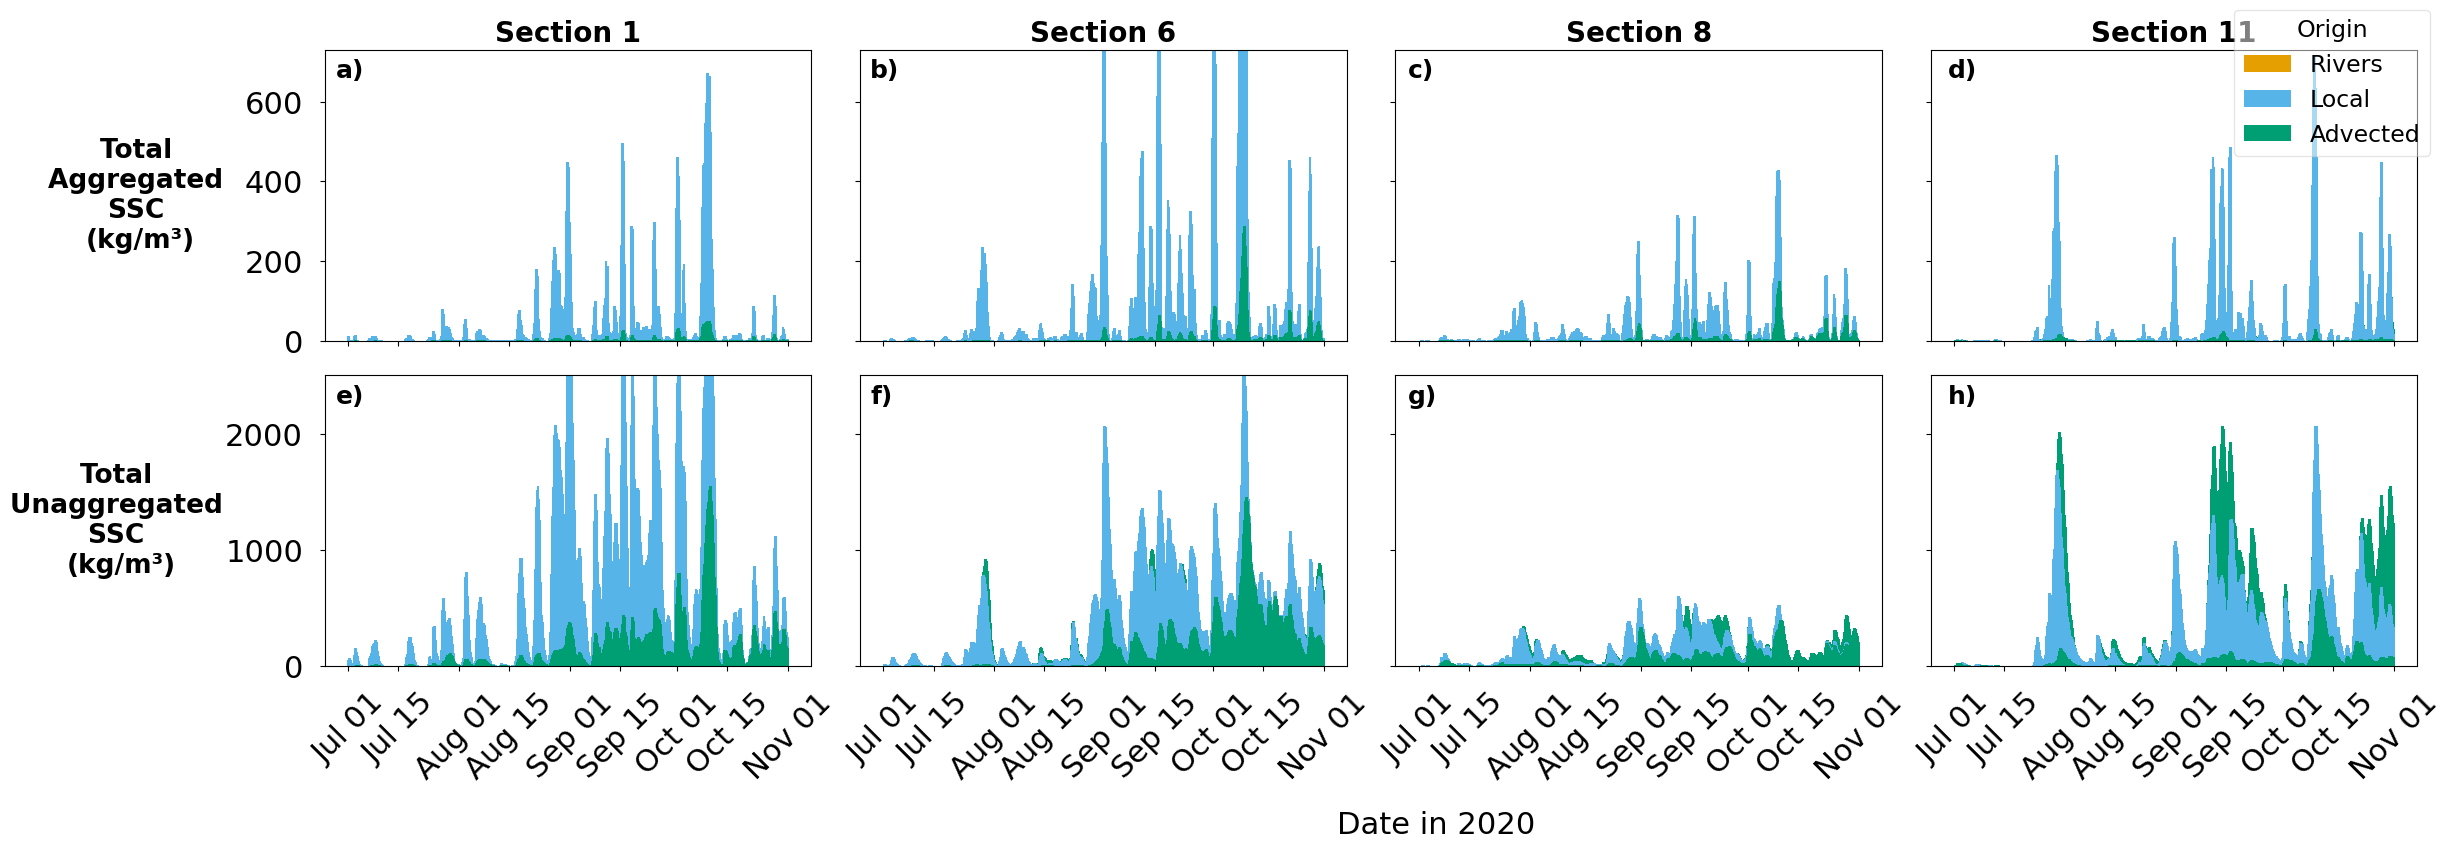

In [20]:

# Make the figure
fig1, ax1 = plt.subplots(2, 4, figsize=(27,8)) # (28, 10)

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom1 = 0
bottom2 = 0
bottom3 = 0
bottom4 = 0
bottom5 = 0
bottom6 = 0
bottom7 = 0
bottom8 = 0

for l in range(len(labels_all)):
    #print(labels[l])
    # Plot aggregated sections 
    ax1[0,0].bar(sec1_data_agg['Date'], sec1_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp_sec1[l])
    bottom1 = bottom1 + sec1_data_agg[labels_all[l]]
    ax1[0,1].bar(sec6_data_agg['Date'], sec6_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp_sec6[l])
    bottom2 = bottom2 + sec6_data_agg[labels_all[l]]
    ax1[0,2].bar(sec8_data_agg['Date'], sec8_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp_sec8[l])
    bottom3 = bottom3 + sec8_data_agg[labels_all[l]]
    ax1[0,3].bar(sec11_data_agg['Date'], sec11_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp_sec11[l])
    bottom4 = bottom4 + sec11_data_agg[labels_all[l]]
    # Plot the unaggregated sections
    ax1[1,0].bar(sec1_data_unag['Date'], sec1_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp_sec1[l])
    bottom5 = bottom5 + sec1_data_unag[labels_all[l]]
    ax1[1,1].bar(sec6_data_unag['Date'], sec6_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp_sec6[l])
    bottom6 = bottom6 + sec6_data_unag[labels_all[l]]
    ax1[1,2].bar(sec8_data_unag['Date'], sec8_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp_sec8[l])
    bottom7 = bottom7 + sec8_data_unag[labels_all[l]]
    ax1[1,3].bar(sec11_data_unag['Date'], sec11_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp_sec11[l])
    bottom8 = bottom8 + sec11_data_unag[labels_all[l]]


# Make a custom legend
# Set colors and labels
legend_handles = [
        Patch(facecolor='#E69F00', label='Rivers'),
        Patch(facecolor='#56B4E9', label='Local'),
        Patch(facecolor='#009E73', label='Advected')
    ]
# Plot it 
plt.legend(handles=legend_handles, title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Plot the legend
#plt.legend(title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Make the ylims the same across plots
ax1[0,0].set_ylim(0,730)
ax1[0,1].set_ylim(0,730)
ax1[0,2].set_ylim(0,730)
ax1[0,3].set_ylim(0,730)
ax1[1,0].set_ylim(0,2500)
ax1[1,1].set_ylim(0,2500)
ax1[1,2].set_ylim(0,2500)
ax1[1,3].set_ylim(0,2500)

# Mute x-axis labels for top row
plt.setp(ax1[0,0].get_xticklabels(), visible=False)
plt.setp(ax1[0,1].get_xticklabels(), visible=False)
plt.setp(ax1[0,2].get_xticklabels(), visible=False)
plt.setp(ax1[0,3].get_xticklabels(), visible=False)

# Mute y-axis labels for inner plots
plt.setp(ax1[0,1].get_yticklabels(), visible=False)
plt.setp(ax1[0,2].get_yticklabels(), visible=False)
plt.setp(ax1[0,3].get_yticklabels(), visible=False)
plt.setp(ax1[1,1].get_yticklabels(), visible=False)
plt.setp(ax1[1,2].get_yticklabels(), visible=False)
plt.setp(ax1[1,3].get_yticklabels(), visible=False)


# Decrease number of x tick labels for bottom row 
#plt.setp(ax1[1,0].get_xticklabels(), visible=True, )
# ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax1[1,2].xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax1[1,3].xaxis.set_major_locator(ticker.MaxNLocator(4))
ax1[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1[1,3].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax1[1,0].tick_params(axis='x', labelrotation=45)
ax1[1,1].tick_params(axis='x', labelrotation=45)
ax1[1,2].tick_params(axis='x', labelrotation=45)
ax1[1,3].tick_params(axis='x', labelrotation=45)
# labels = ['2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01']
# ax1[1,0].set_xticklabels(labels)
# ax1[1,1].set_xticklabels(labels)
# ax1[1,2].set_xticklabels(labels)
# ax1[1,3].set_xticklabels(labels)

# Set subplot titles
ax1[0,0].set_title('Section 1', fontsize=fontsize-2, weight='bold')
ax1[0,1].set_title('Section 6', fontsize=fontsize-2, weight='bold')
ax1[0,2].set_title('Section 8', fontsize=fontsize-2, weight='bold')
ax1[0,3].set_title('Section 11', fontsize=fontsize-2, weight='bold')

# Label axes
ax1[0,0].set_ylabel('Total \nAggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center', weight='bold')
ax1[1,0].set_ylabel('Total \nUnaggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center', weight='bold')
# ax1[1,0].set_xlabel('Date', fontsize=fontsize-2)
# ax1[1,1].set_xlabel('Date', fontsize=fontsize-2)
# ax1[1,2].set_xlabel('Date', fontsize=fontsize-2)
# ax1[1,3].set_xlabel('Date', fontsize=fontsize-2)
fig1.text(0.50, -0.1, 'Date in 2020', fontsize=fontsize)

# Add subplot labels 
fig1.text(0.129, 0.845, 'a)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.327, 0.845, 'b)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.526, 0.845, 'c)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.726, 0.845, 'd)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.129, 0.438, 'e)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.327, 0.438, 'f)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.526, 0.438, 'g)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.726, 0.438, 'h)', color='black', fontsize=fontsize-4, weight='bold')

#ax1.set_xlabel('Date', fontsize=fontsize)
#ax1.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
#plt.suptitle('SSC Composition in Sections (kg/m\u00b3)', fontsize=fontsize)

# Adjust spacing
fig1.subplots_adjust(wspace=0.10, hspace=0.12)

In [18]:
# Make new colors that are in order
colors_tmp2_sec1 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',  
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#56B4E9',]
colors_tmp2_sec6 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#56B4E9']
colors_tmp2_sec8 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#56B4E9']
colors_tmp2_sec11 = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#56B4E9']
colors_tmp2_3colors = ['#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00',
              '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#E69F00', '#009E73', 
              '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#009E73',
               '#009E73', '#009E73', '#009E73', '#009E73', '#009E73', '#56B4E9']

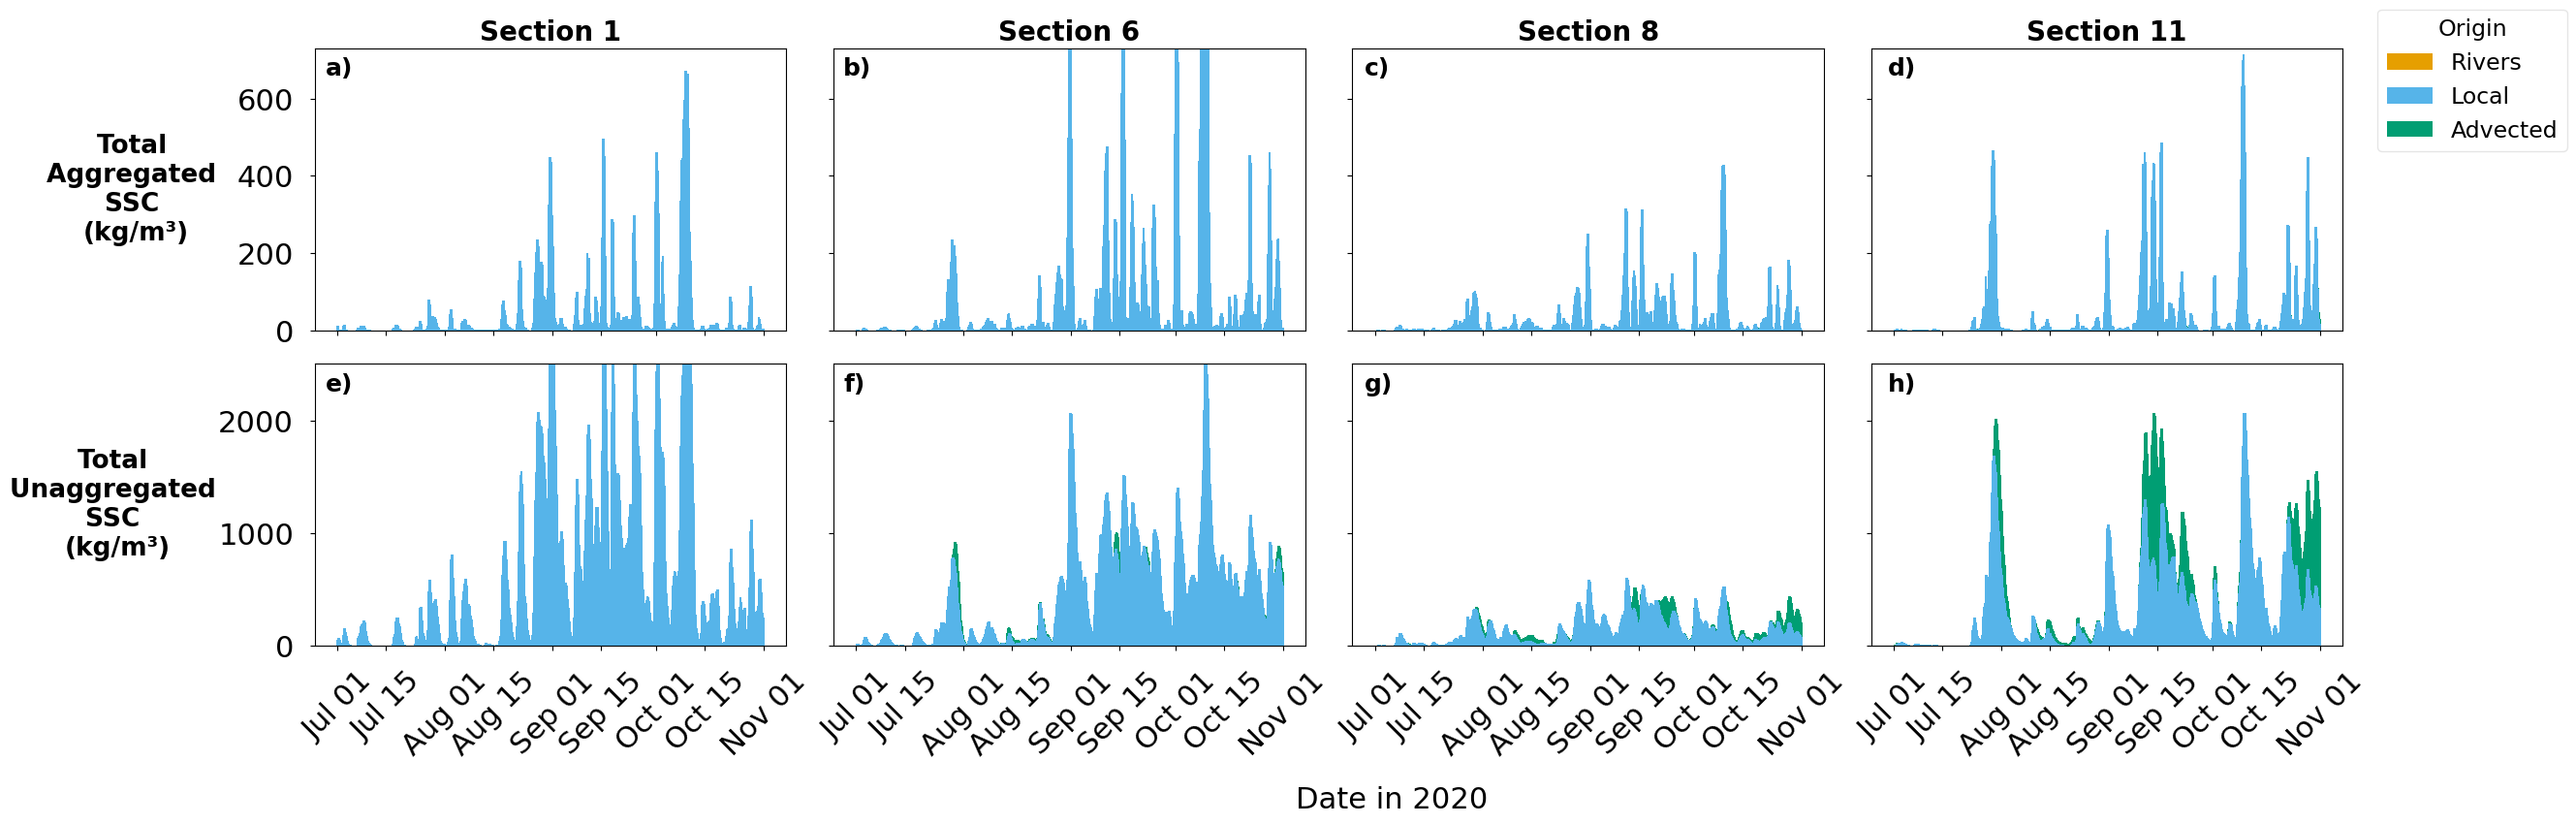

In [28]:
# Remake this plot but try to get the greens and 
# blues to be togetherrrrr
# Make the figure
fig1, ax1 = plt.subplots(2, 4, figsize=(27,8)) # (28, 10)

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom1 = 0
bottom2 = 0
bottom3 = 0
bottom4 = 0
bottom5 = 0
bottom6 = 0
bottom7 = 0
bottom8 = 0

for l in range(len(labels_all)):
    #print(labels[l])
    # Plot aggregated sections 
    ax1[0,0].bar(sec1_agg_neworder['Date'], sec1_agg_neworder[labels_all_sec1[l]], label=labels_all_sec1[l], color=colors_tmp2_3colors[l])
    bottom1 = bottom1 + sec1_agg_neworder[labels_all_sec1[l]]
    ax1[0,1].bar(sec6_agg_neworder['Date'], sec6_agg_neworder[labels_all_sec6[l]], label=labels_all_sec6[l], color=colors_tmp2_3colors[l])
    bottom2 = bottom2 + sec6_agg_neworder[labels_all_sec6[l]]
    ax1[0,2].bar(sec8_agg_neworder['Date'], sec8_agg_neworder[labels_all_sec8[l]], label=labels_all_sec8[l], color=colors_tmp2_3colors[l])
    bottom3 = bottom3 + sec8_agg_neworder[labels_all_sec8[l]]
    ax1[0,3].bar(sec11_agg_neworder['Date'], sec11_agg_neworder[labels_all_sec11[l]], label=labels_all_sec11[l], color=colors_tmp2_3colors[l])
    bottom4 = bottom4 + sec11_agg_neworder[labels_all_sec11[l]]
    # Plot the unaggregated sections
    ax1[1,0].bar(sec1_unag_neworder['Date'], sec1_unag_neworder[labels_all_sec1[l]], label=labels_all_sec1[l], color=colors_tmp2_3colors[l])
    bottom5 = bottom5 + sec1_unag_neworder[labels_all_sec1[l]]
    ax1[1,1].bar(sec6_unag_neworder['Date'], sec6_unag_neworder[labels_all_sec6[l]], label=labels_all_sec6[l], color=colors_tmp2_3colors[l])
    bottom6 = bottom6 + sec6_unag_neworder[labels_all_sec6[l]]
    ax1[1,2].bar(sec8_unag_neworder['Date'], sec8_unag_neworder[labels_all_sec8[l]], label=labels_all_sec8[l], color=colors_tmp2_3colors[l])
    bottom7 = bottom7 + sec8_unag_neworder[labels_all_sec8[l]]
    ax1[1,3].bar(sec11_unag_neworder['Date'], sec11_unag_neworder[labels_all_sec11[l]], label=labels_all_sec11[l], color=colors_tmp2_3colors[l])
    bottom8 = bottom8 + sec11_unag_neworder[labels_all_sec11[l]]


# Make a custom legend
# Set colors and labels
legend_handles = [
        Patch(facecolor='#E69F00', label='Rivers'),
        Patch(facecolor='#56B4E9', label='Local'),
        Patch(facecolor='#009E73', label='Advected')
    ]
# Plot it 
plt.legend(handles=legend_handles, title='Origin', bbox_to_anchor=(1.50, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Good way to check if colors are right!
# ax1[0,0].legend()
# ax1[0,1].legend()
# ax1[0,2].legend()
# ax1[0,3].legend()

# Plot the legend
#plt.legend(title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Make the ylims the same across plots
ax1[0,0].set_ylim(0,730)
ax1[0,1].set_ylim(0,730)
ax1[0,2].set_ylim(0,730)
ax1[0,3].set_ylim(0,730)
ax1[1,0].set_ylim(0,2500)
ax1[1,1].set_ylim(0,2500)
ax1[1,2].set_ylim(0,2500)
ax1[1,3].set_ylim(0,2500)

# Mute x-axis labels for top row
plt.setp(ax1[0,0].get_xticklabels(), visible=False)
plt.setp(ax1[0,1].get_xticklabels(), visible=False)
plt.setp(ax1[0,2].get_xticklabels(), visible=False)
plt.setp(ax1[0,3].get_xticklabels(), visible=False)

# Mute y-axis labels for inner plots
plt.setp(ax1[0,1].get_yticklabels(), visible=False)
plt.setp(ax1[0,2].get_yticklabels(), visible=False)
plt.setp(ax1[0,3].get_yticklabels(), visible=False)
plt.setp(ax1[1,1].get_yticklabels(), visible=False)
plt.setp(ax1[1,2].get_yticklabels(), visible=False)
plt.setp(ax1[1,3].get_yticklabels(), visible=False)


# Decrease number of x tick labels for bottom row 
#plt.setp(ax1[1,0].get_xticklabels(), visible=True, )
# ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax1[1,2].xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax1[1,3].xaxis.set_major_locator(ticker.MaxNLocator(4))
ax1[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1[1,3].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax1[1,0].tick_params(axis='x', labelrotation=45)
ax1[1,1].tick_params(axis='x', labelrotation=45)
ax1[1,2].tick_params(axis='x', labelrotation=45)
ax1[1,3].tick_params(axis='x', labelrotation=45)
# labels = ['2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01']
# ax1[1,0].set_xticklabels(labels)
# ax1[1,1].set_xticklabels(labels)
# ax1[1,2].set_xticklabels(labels)
# ax1[1,3].set_xticklabels(labels)

# Set subplot titles
ax1[0,0].set_title('Section 1', fontsize=fontsize-2, weight='bold')
ax1[0,1].set_title('Section 6', fontsize=fontsize-2, weight='bold')
ax1[0,2].set_title('Section 8', fontsize=fontsize-2, weight='bold')
ax1[0,3].set_title('Section 11', fontsize=fontsize-2, weight='bold')

# Label axes
ax1[0,0].set_ylabel('Total \nAggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center', weight='bold')
ax1[1,0].set_ylabel('Total \nUnaggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center', weight='bold')
# ax1[1,0].set_xlabel('Date', fontsize=fontsize-2)
# ax1[1,1].set_xlabel('Date', fontsize=fontsize-2)
# ax1[1,2].set_xlabel('Date', fontsize=fontsize-2)
# ax1[1,3].set_xlabel('Date', fontsize=fontsize-2)
fig1.text(0.50, -0.1, 'Date in 2020', fontsize=fontsize)

# Add subplot labels 
fig1.text(0.129, 0.845, 'a)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.327, 0.845, 'b)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.526, 0.845, 'c)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.726, 0.845, 'd)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.129, 0.438, 'e)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.327, 0.438, 'f)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.526, 0.438, 'g)', color='black', fontsize=fontsize-4, weight='bold')
fig1.text(0.726, 0.438, 'h)', color='black', fontsize=fontsize-4, weight='bold')

#ax1.set_xlabel('Date', fontsize=fontsize)
#ax1.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
#plt.suptitle('SSC Composition in Sections (kg/m\u00b3)', fontsize=fontsize)

# Adjust spacing
fig1.subplots_adjust(wspace=0.10, hspace=0.12)

In [ ]:
np.max(sec6_data_agg['Section 6'])

Make a few of the above plots so I can pick which sections to use for the paper...

In [ ]:
# Sections 1 - 4
# Plot top panel of aggregated and bottom panel of unaggregated

# Make the figure
fig1, ax1 = plt.subplots(2, 4, figsize=(28,10))

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom1 = 0
bottom2 = 0
bottom3 = 0
bottom4 = 0
bottom5 = 0
bottom6 = 0
bottom7 = 0
bottom8 = 0

for l in range(len(labels_all)):
    #print(labels[l])
    # Plot aggregated sections 
    ax1[0,0].bar(sec1_data_agg['Date'], sec1_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom1 = bottom1 + sec1_data_agg[labels_all[l]]
    ax1[0,1].bar(sec2_data_agg['Date'], sec2_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom2 = bottom2 + sec2_data_agg[labels_all[l]]
    ax1[0,2].bar(sec3_data_agg['Date'], sec3_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom3 = bottom3 + sec3_data_agg[labels_all[l]]
    ax1[0,3].bar(sec4_data_agg['Date'], sec4_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom4 = bottom4 + sec4_data_agg[labels_all[l]]
    # Plot the unaggregated sections
    ax1[1,0].bar(sec1_data_unag['Date'], sec1_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom5 = bottom5 + sec1_data_unag[labels_all[l]]
    ax1[1,1].bar(sec2_data_unag['Date'], sec2_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom6 = bottom6 + sec2_data_unag[labels_all[l]]
    ax1[1,2].bar(sec3_data_unag['Date'], sec3_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom7 = bottom7 + sec3_data_unag[labels_all[l]]
    ax1[1,3].bar(sec4_data_unag['Date'], sec4_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom8 = bottom8 + sec4_data_unag[labels_all[l]]



# Plot the legend
plt.legend(title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Make the ylims the same across plots
ax1[0,0].set_ylim(0,730)
ax1[0,1].set_ylim(0,730)
ax1[0,2].set_ylim(0,730)
ax1[0,3].set_ylim(0,730)
ax1[1,0].set_ylim(0,2100)
ax1[1,1].set_ylim(0,2100)
ax1[1,2].set_ylim(0,2100)
ax1[1,3].set_ylim(0,2100)

# Mute x-axis labels for top row
plt.setp(ax1[0,0].get_xticklabels(), visible=False)
plt.setp(ax1[0,1].get_xticklabels(), visible=False)
plt.setp(ax1[0,2].get_xticklabels(), visible=False)
plt.setp(ax1[0,3].get_xticklabels(), visible=False)

# Mute y-axis labels for inner plots
plt.setp(ax1[0,1].get_yticklabels(), visible=False)
plt.setp(ax1[0,2].get_yticklabels(), visible=False)
plt.setp(ax1[0,3].get_yticklabels(), visible=False)
plt.setp(ax1[1,1].get_yticklabels(), visible=False)
plt.setp(ax1[1,2].get_yticklabels(), visible=False)
plt.setp(ax1[1,3].get_yticklabels(), visible=False)


# Decrease number of x tick labels for bottom row 
#plt.setp(ax1[1,0].get_xticklabels(), visible=True, )
ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,2].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,3].xaxis.set_major_locator(ticker.MaxNLocator(2))

# Set subplot titles
ax1[0,0].set_title('Section 1', fontsize=fontsize-3)
ax1[0,1].set_title('Section 2', fontsize=fontsize-3)
ax1[0,2].set_title('Section 3', fontsize=fontsize-3)
ax1[0,3].set_title('Section 4', fontsize=fontsize-3)

# Label axes
ax1[0,0].set_ylabel('Total \nAggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_ylabel('Total \nUnaggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,1].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,2].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,3].set_xlabel('Date', fontsize=fontsize-2)

#ax1.set_xlabel('Date', fontsize=fontsize)
#ax1.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
#plt.suptitle('SSC Composition in Sections (kg/m\u00b3)', fontsize=fontsize)

# Adjust spacing
fig1.subplots_adjust(wspace=0.10, hspace=0.12)

In [ ]:
# Sections 5 - 8
# Make the figure
fig1, ax1 = plt.subplots(2, 4, figsize=(28,10))

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom1 = 0
bottom2 = 0
bottom3 = 0
bottom4 = 0
bottom5 = 0
bottom6 = 0
bottom7 = 0
bottom8 = 0

for l in range(len(labels_all)):
    #print(labels[l])
    # Plot aggregated sections 
    ax1[0,0].bar(sec5_data_agg['Date'], sec5_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom1 = bottom1 + sec5_data_agg[labels_all[l]]
    ax1[0,1].bar(sec6_data_agg['Date'], sec6_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom2 = bottom2 + sec6_data_agg[labels_all[l]]
    ax1[0,2].bar(sec7_data_agg['Date'], sec7_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom3 = bottom3 + sec7_data_agg[labels_all[l]]
    ax1[0,3].bar(sec8_data_agg['Date'], sec8_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom4 = bottom4 + sec8_data_agg[labels_all[l]]
    # Plot the unaggregated sections
    ax1[1,0].bar(sec5_data_unag['Date'], sec5_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom5 = bottom5 + sec5_data_unag[labels_all[l]]
    ax1[1,1].bar(sec6_data_unag['Date'], sec6_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom6 = bottom6 + sec6_data_unag[labels_all[l]]
    ax1[1,2].bar(sec7_data_unag['Date'], sec7_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom7 = bottom7 + sec7_data_unag[labels_all[l]]
    ax1[1,3].bar(sec8_data_unag['Date'], sec8_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom8 = bottom8 + sec8_data_unag[labels_all[l]]



# Plot the legend
plt.legend(title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Make the ylims the same across plots
ax1[0,0].set_ylim(0,730)
ax1[0,1].set_ylim(0,730)
ax1[0,2].set_ylim(0,730)
ax1[0,3].set_ylim(0,730)
ax1[1,0].set_ylim(0,2100)
ax1[1,1].set_ylim(0,2100)
ax1[1,2].set_ylim(0,2100)
ax1[1,3].set_ylim(0,2100)

# Mute x-axis labels for top row
plt.setp(ax1[0,0].get_xticklabels(), visible=False)
plt.setp(ax1[0,1].get_xticklabels(), visible=False)
plt.setp(ax1[0,2].get_xticklabels(), visible=False)
plt.setp(ax1[0,3].get_xticklabels(), visible=False)

# Mute y-axis labels for inner plots
plt.setp(ax1[0,1].get_yticklabels(), visible=False)
plt.setp(ax1[0,2].get_yticklabels(), visible=False)
plt.setp(ax1[0,3].get_yticklabels(), visible=False)
plt.setp(ax1[1,1].get_yticklabels(), visible=False)
plt.setp(ax1[1,2].get_yticklabels(), visible=False)
plt.setp(ax1[1,3].get_yticklabels(), visible=False)


# Decrease number of x tick labels for bottom row 
#plt.setp(ax1[1,0].get_xticklabels(), visible=True, )
ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,2].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,3].xaxis.set_major_locator(ticker.MaxNLocator(2))

# Set subplot titles
ax1[0,0].set_title('Section 5', fontsize=fontsize-3)
ax1[0,1].set_title('Section 6', fontsize=fontsize-3)
ax1[0,2].set_title('Section 7', fontsize=fontsize-3)
ax1[0,3].set_title('Section 8', fontsize=fontsize-3)

# Label axes
ax1[0,0].set_ylabel('Total \nAggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_ylabel('Total \nUnaggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,1].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,2].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,3].set_xlabel('Date', fontsize=fontsize-2)

#ax1.set_xlabel('Date', fontsize=fontsize)
#ax1.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
#plt.suptitle('SSC Composition in Sections (kg/m\u00b3)', fontsize=fontsize)

# Adjust spacing
fig1.subplots_adjust(wspace=0.10, hspace=0.12)

In [ ]:
# Sections 9 - 12
# Make the figure
fig1, ax1 = plt.subplots(2, 4, figsize=(28,10))

# Plot a stacked bar chart? Over time?
# To do this, would need to cumulatively add to the bottom argument soooo this would take forever 
# Could be worth trying to do some sort of loop?
bottom1 = 0
bottom2 = 0
bottom3 = 0
bottom4 = 0
bottom5 = 0
bottom6 = 0
bottom7 = 0
bottom8 = 0

for l in range(len(labels_all)):
    #print(labels[l])
    # Plot aggregated sections 
    ax1[0,0].bar(sec9_data_agg['Date'], sec9_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom1 = bottom1 + sec9_data_agg[labels_all[l]]
    ax1[0,1].bar(sec10_data_agg['Date'], sec10_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom2 = bottom2 + sec10_data_agg[labels_all[l]]
    ax1[0,2].bar(sec11_data_agg['Date'], sec11_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom3 = bottom3 + sec11_data_agg[labels_all[l]]
    ax1[0,3].bar(sec12_data_agg['Date'], sec12_data_agg[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom4 = bottom4 + sec12_data_agg[labels_all[l]]
    # Plot the unaggregated sections
    ax1[1,0].bar(sec9_data_unag['Date'], sec9_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom5 = bottom5 + sec9_data_unag[labels_all[l]]
    ax1[1,1].bar(sec10_data_unag['Date'], sec10_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom6 = bottom6 + sec10_data_unag[labels_all[l]]
    ax1[1,2].bar(sec11_data_unag['Date'], sec11_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom7 = bottom7 + sec11_data_unag[labels_all[l]]
    ax1[1,3].bar(sec12_data_unag['Date'], sec12_data_unag[labels_all[l]], label=labels_all[l], color=colors_tmp[l])
    bottom8 = bottom8 + sec12_data_unag[labels_all[l]]



# Plot the legend
plt.legend(title='Origin', bbox_to_anchor=(1.05, 2.30), fontsize=fontsize-5, title_fontsize=fontsize-5, framealpha=0.5)

# Make the ylims the same across plots
ax1[0,0].set_ylim(0,730)
ax1[0,1].set_ylim(0,730)
ax1[0,2].set_ylim(0,730)
ax1[0,3].set_ylim(0,730)
ax1[1,0].set_ylim(0,2100)
ax1[1,1].set_ylim(0,2100)
ax1[1,2].set_ylim(0,2100)
ax1[1,3].set_ylim(0,2100)

# Mute x-axis labels for top row
plt.setp(ax1[0,0].get_xticklabels(), visible=False)
plt.setp(ax1[0,1].get_xticklabels(), visible=False)
plt.setp(ax1[0,2].get_xticklabels(), visible=False)
plt.setp(ax1[0,3].get_xticklabels(), visible=False)

# Mute y-axis labels for inner plots
plt.setp(ax1[0,1].get_yticklabels(), visible=False)
plt.setp(ax1[0,2].get_yticklabels(), visible=False)
plt.setp(ax1[0,3].get_yticklabels(), visible=False)
plt.setp(ax1[1,1].get_yticklabels(), visible=False)
plt.setp(ax1[1,2].get_yticklabels(), visible=False)
plt.setp(ax1[1,3].get_yticklabels(), visible=False)


# Decrease number of x tick labels for bottom row 
#plt.setp(ax1[1,0].get_xticklabels(), visible=True, )
ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,2].xaxis.set_major_locator(ticker.MaxNLocator(2))
ax1[1,3].xaxis.set_major_locator(ticker.MaxNLocator(2))

# Set subplot titles
ax1[0,0].set_title('Section 9', fontsize=fontsize-3)
ax1[0,1].set_title('Section 10', fontsize=fontsize-3)
ax1[0,2].set_title('Section 11', fontsize=fontsize-3)
ax1[0,3].set_title('Section 12', fontsize=fontsize-3)

# Label axes
ax1[0,0].set_ylabel('Total \nAggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_ylabel('Total \nUnaggregated \nSSC \n(kg/m\u00b3)', fontsize=fontsize-3, rotation=0, labelpad=75, va='center')
ax1[1,0].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,1].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,2].set_xlabel('Date', fontsize=fontsize-2)
ax1[1,3].set_xlabel('Date', fontsize=fontsize-2)

#ax1.set_xlabel('Date', fontsize=fontsize)
#ax1.set_ylabel('SSC (kg/m\u00b3)', fontsize=fontsize)
#plt.suptitle('SSC Composition in Sections (kg/m\u00b3)', fontsize=fontsize)

# Adjust spacing
fig1.subplots_adjust(wspace=0.10, hspace=0.12)

### Stats!
Calculate and print some stats to put in the paper whoo!


In [ ]:
sec1_data_agg

In [ ]:
# Print the percent of SSC in section 1 that is from the Colville
# Aggregated 
# Get the total ssc in section 1 over time 
tot_ssc_sec1_agg = sec1_data_agg.drop(columns=['Date']).sum(axis=1)

# Get the percentage over time of Colville in section 1 relative to total in section 1`
# exclude first time step since it's all 0s 
percent_col_in_sec1_agg = sec1_data_agg['Colville']/tot_ssc_sec1_agg[1:]
print('percent_col_in_secc1_agg shape: ', np.shape(percent_col_in_sec1_agg))

# Take the mean and standard deviation
mean_percent_col_in_sec1_agg = np.mean(percent_col_in_sec1_agg)
print('mean_percent_col_in_sec1_agg: ', mean_percent_col_in_sec1_agg*100)
std_percent_col_in_sec1_agg = np.std(percent_col_in_sec1_agg)
print('std_percent_col_in_sec1_agg: ', std_percent_col_in_sec1_agg*100)

# Unaggregated
# Get the total ssc in section 1 over time 
tot_ssc_sec1_unag = sec1_data_unag.drop(columns=['Date']).sum(axis=1)

# Get the percentage over time of Colville in section 1 relative to total in section 1`
# exclude first time step since it's all 0s 
percent_col_in_sec1_unag = sec1_data_unag['Colville']/tot_ssc_sec1_unag[1:]
print('percent_col_in_secc1_unag shape: ', np.shape(percent_col_in_sec1_unag))

# Take the mean and standard deviation
mean_percent_col_in_sec1_unag = np.mean(percent_col_in_sec1_unag)
print('mean_percent_col_in_sec1_unag: ', mean_percent_col_in_sec1_unag*100)
std_percent_col_in_sec1_unag = np.std(percent_col_in_sec1_unag)
print('std_percent_col_in_sec1_unag: ', std_percent_col_in_sec1_unag*100)

In [ ]:
np.max(tot_ssc_sec1_agg)

In [ ]:
np.min(tot_ssc_sec1_agg_nozero)

In [ ]:
np.where(tot_ssc_sec1_agg == 0.0)